In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data import TimeSeriesData
from src.models import ARMADataGenerator
from src.utils import PrecipitationClassifier


In [3]:
path = "/Users/cooper/Desktop/precipitation-generator/data/raw/GSTEIGmeteo.csv"
ts_data = TimeSeriesData.from_csv(path)

In [4]:
ts_data.data

,precipitation
date,
1986-01-01,2.5
1986-01-02,0.2
1986-01-03,4.3
1986-01-04,3.4
1986-01-05,3.6
...,...
2000-09-26,0.0
2000-09-27,0.0
2000-09-28,0.0


In [5]:
ts_data.get_time_resolution()

'D'

In [6]:
weelkly_data = ts_data.resample_data("W")
weelkly_data.data

,precipitation
date,
1986-01-05,2.800000
1986-01-12,6.600000
1986-01-19,13.971429
1986-01-26,8.228571
1986-02-02,6.000000
...,...
2000-09-03,3.071429
2000-09-10,2.300000
2000-09-17,0.471429


In [7]:
ts_data.data

,precipitation
date,
1986-01-01,2.5
1986-01-02,0.2
1986-01-03,4.3
1986-01-04,3.4
1986-01-05,3.6
...,...
2000-09-26,0.0
2000-09-27,0.0
2000-09-28,0.0


In [8]:
filtered_data = ts_data.filter_by_date_range('1986-01-05', '1987-01-01')
filtered_data.data


,precipitation
date,
1986-01-05,3.6
1986-01-06,2.0
1986-01-07,0.5
1986-01-08,6.7
1986-01-09,2.6
...,...
1986-12-28,3.6
1986-12-29,0.7
1986-12-30,0.0


In [9]:
precip_series = ts_data.get_precipitation_series()
precip_series

date
1986-01-01     2.5
1986-01-02     0.2
1986-01-03     4.3
1986-01-04     3.4
1986-01-05     3.6
              ... 
2000-09-26     0.0
2000-09-27     0.0
2000-09-28     0.0
2000-09-29     5.0
2000-09-30    30.4
Name: precipitation, Length: 5387, dtype: float64

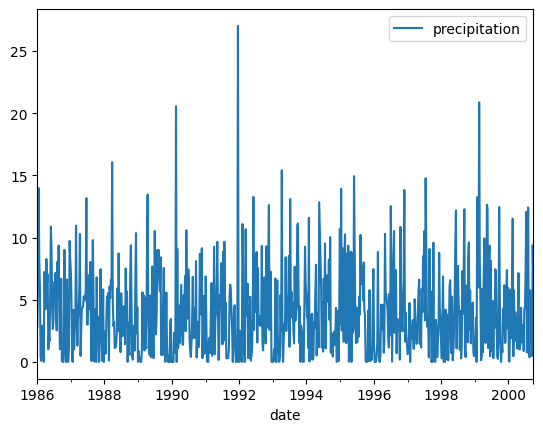

In [10]:
weelkly_data.plot()

In [11]:
arma_generator = ARMADataGenerator(order=(1,2), steps=365)
arma_generator.fit(ts_data.get_precipitation_series())
synthetic_data = arma_generator.generate(n_trajectories=200)


/opt/anaconda3/envs/PrecipGen/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/PrecipGen/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/PrecipGen/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1000x500 with 0 Axes>

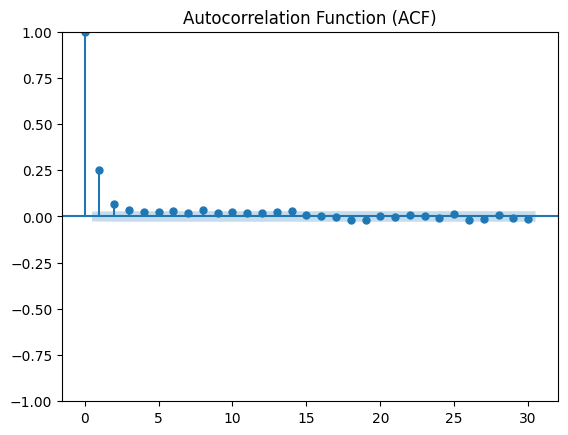

<Figure size 1000x500 with 0 Axes>

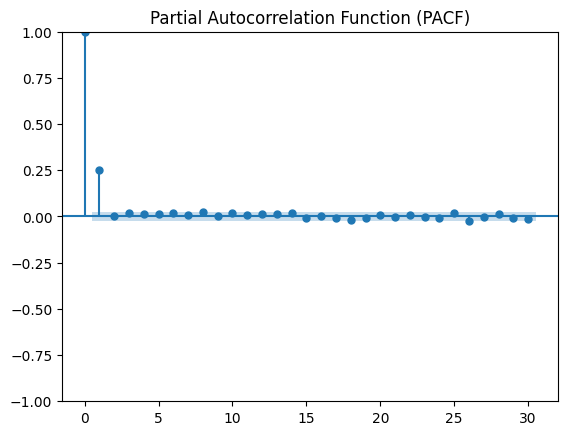

In [12]:
arma_generator.display_acf_plot(lags=30)
arma_generator.display_pacf_plot(lags=30)

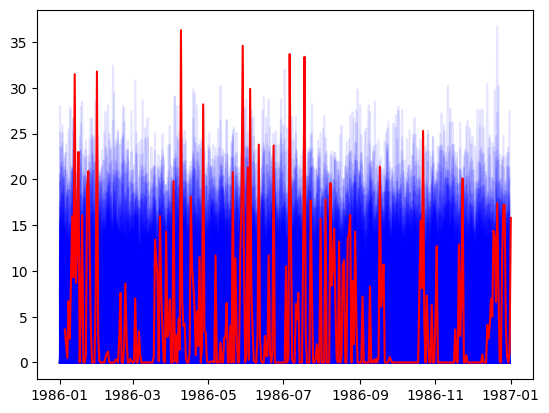

In [13]:
for i in range(1,201):
    plt.plot(synthetic_data[f"Sim_{i}"], color='blue', alpha=0.1)

plt.plot(filtered_data.get_precipitation_series(), color='red')
plt.show()

In [14]:
classifier = PrecipitationClassifier()
classified_data = classifier.classify_precipitation(synthetic_data)


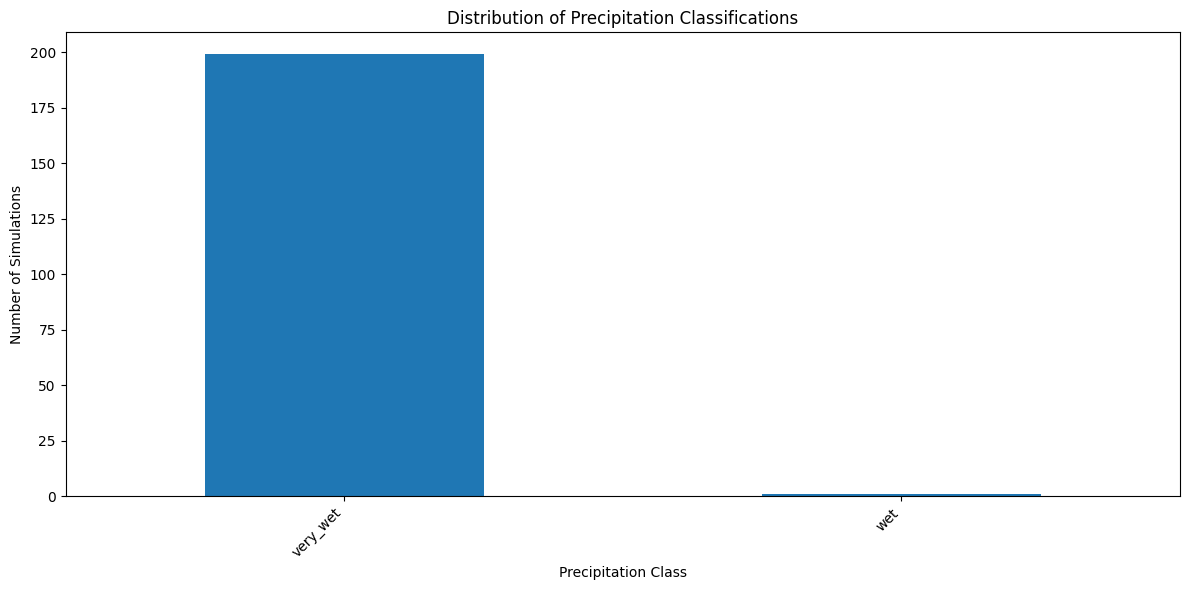

In [15]:
# Plot the distribution of classifications
classifier.plot_classification_distribution(classified_data)

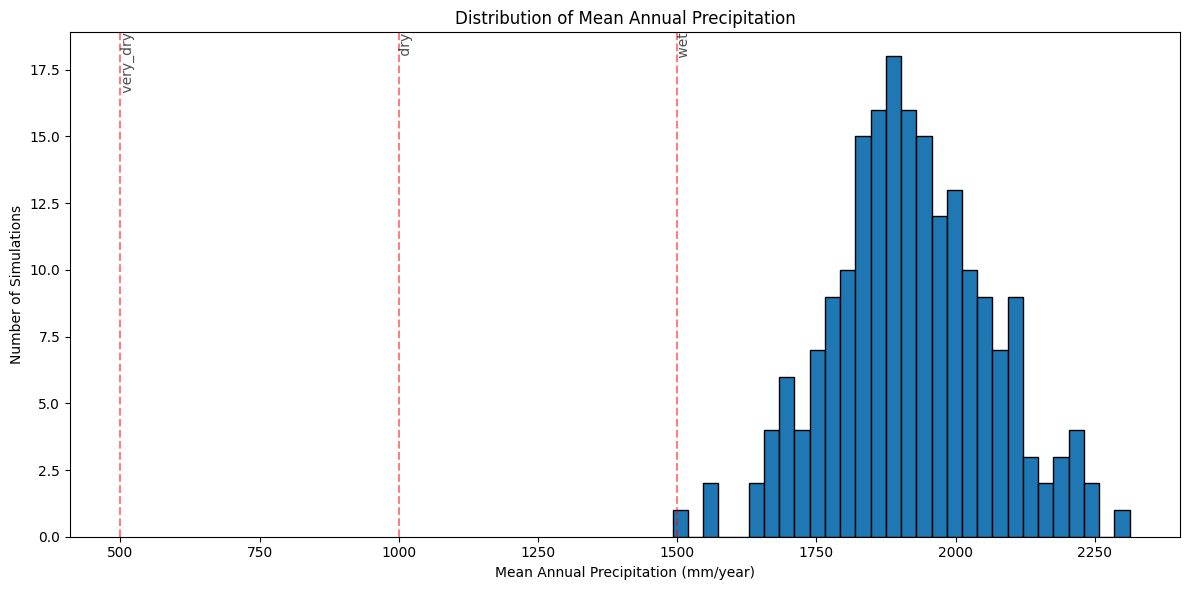

In [16]:
# Plot the distribution of mean annual precipitation
classifier.plot_annual_mean_distribution(synthetic_data)

In [17]:
# Print the classification results
print(classified_data)

      Sim_1     Sim_2     Sim_3     Sim_4     Sim_5     Sim_6     Sim_7  \
0  very_wet  very_wet  very_wet  very_wet  very_wet  very_wet  very_wet   

      Sim_8     Sim_9    Sim_10  ...   Sim_191   Sim_192   Sim_193   Sim_194  \
0  very_wet  very_wet  very_wet  ...  very_wet  very_wet  very_wet  very_wet   

    Sim_195   Sim_196   Sim_197   Sim_198   Sim_199   Sim_200  
0  very_wet  very_wet  very_wet  very_wet  very_wet  very_wet  

[1 rows x 200 columns]
